#  Importing Libraries and Reading Data

In [22]:
# Importing Libraries

import pandas as pd # Data manipulation
import numpy as np # Matrix calculation
import geopandas as gpd # GIS of Pandas
import seaborn as sns # Part of matplotlib for Data Viz
import matplotlib.pyplot as plt # Data visualization
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler



In [2]:
# Reading 2000-2023 Aggregated Yield Data
df_agg_00_23=pd.read_csv('data/rm_yield_00_23_major_crops.csv')
print(df_agg_00_23.columns)

# Reading GIS
gdf_rm=gpd.read_file('data/RuralMunicipality.shp')

# Changing data type 
gdf_rm['RMNO']=gdf_rm['RMNO'].astype(int)
gdf_rm_clean=gdf_rm[['RMNO', 'geometry']].rename(columns={'RMNO': 'RM'})

Index(['RM', 'Canola_mean', 'Canola_std', 'Spring Wheat_mean',
       'Spring Wheat_std', 'Durum_mean', 'Durum_std', 'Oats_mean', 'Oats_std',
       'Lentils_mean', 'Lentils_std', 'Peas_mean', 'Peas_std', 'Barley_mean',
       'Barley_std'],
      dtype='object')


### Data Cleaning and Preparation

In [3]:
# Ensure 'RM' columns are strings
df_agg_00_23['RM'] = df_agg_00_23['RM'].astype(str)
gdf_rm_clean['RM'] = gdf_rm_clean['RM'].astype(str)

# Cleaning function for RM column
def clean_rm_column(df):
    df['RM'] = df['RM'].str.strip().str.title()
    return df

# Apply the cleaning function to both dataframes
df_agg_00_23 = clean_rm_column(df_agg_00_23)
gdf_rm_clean = clean_rm_column(gdf_rm_clean)


### Merging Data Frames

In [4]:
# Merge the cleaned dataframes on 'RM'
merged_data = gdf_rm_clean.merge(df_agg_00_23, on='RM', how='left')

# Convert to GeoDataFrame
gdf = gpd.GeoDataFrame(merged_data, geometry='geometry')

# Save merged data for future use
gdf.to_file('merged_data.geojson', driver='GeoJSON')


In [5]:
#Testing code
#print(merged_data.columns)
print(df_agg_00_23.columns)

Index(['RM', 'Canola_mean', 'Canola_std', 'Spring Wheat_mean',
       'Spring Wheat_std', 'Durum_mean', 'Durum_std', 'Oats_mean', 'Oats_std',
       'Lentils_mean', 'Lentils_std', 'Peas_mean', 'Peas_std', 'Barley_mean',
       'Barley_std'],
      dtype='object')


### Trend Analysis for Barley

### Box Plot to Identify Outliers

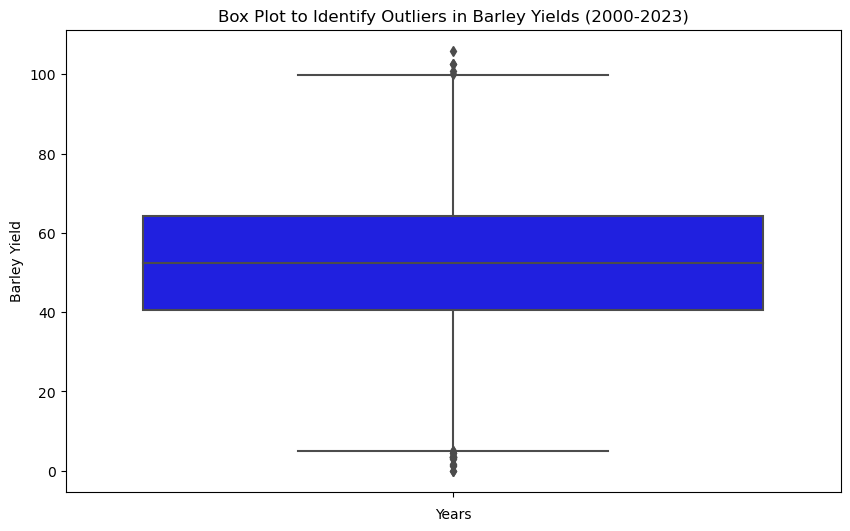

In [37]:
# Reading the original rm-yields-data.csv file again to ensure consistency
rm_yields_data = pd.read_csv('data/rm-yields-data.csv')

# Filtering the data for the years 2000 to 2023
filtered_data = rm_yields_data[(rm_yields_data['Year'] >= 2000) & (rm_yields_data['Year'] <= 2023)]

# Create the box plot for barley yields
plt.figure(figsize=(10, 6))
sns.boxplot(y='Barley', data=filtered_data, color='blue')
plt.title('Box Plot to Identify Outliers in Barley Yields (2000-2023)')
plt.ylabel('Barley Yield')
plt.xlabel('Years')
plt.show()



#### Step 2: Remove Outliers

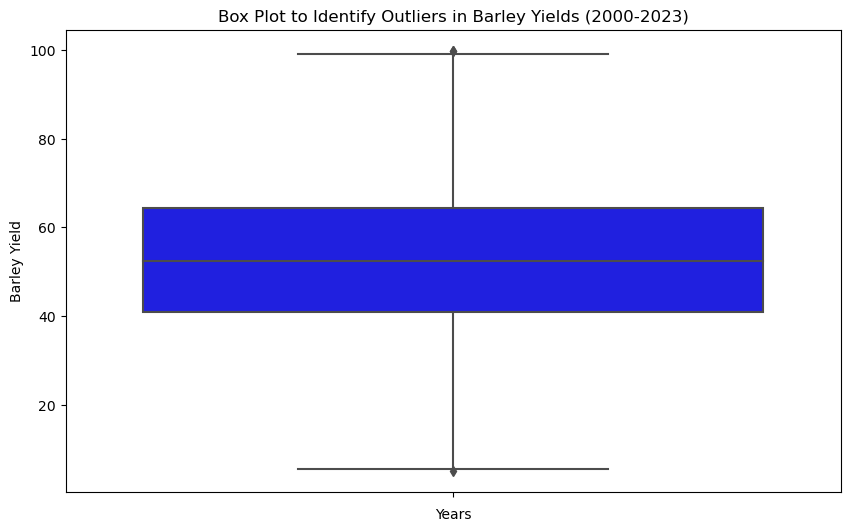

In [10]:
# Calculate the IQR
Q1 = filtered_data['Barley'].quantile(0.25)
Q3 = filtered_data['Barley'].quantile(0.75)
IQR = Q3 - Q1

# Define the upper and lower bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
cleaned_data = filtered_data[(filtered_data['Barley'] >= lower_bound) & (filtered_data['Barley'] <= upper_bound)]

# Create the box plot after removing outliers for barley yields
plt.figure(figsize=(10, 6))
sns.boxplot(y='Barley', data= cleaned_data, color='blue')
plt.title('Box Plot after removing Outliers in Barley Yields (2000-2023)')
plt.ylabel('Barley Yield')
plt.xlabel('Years')
plt.show()


#### Step 3: Trend Analysis

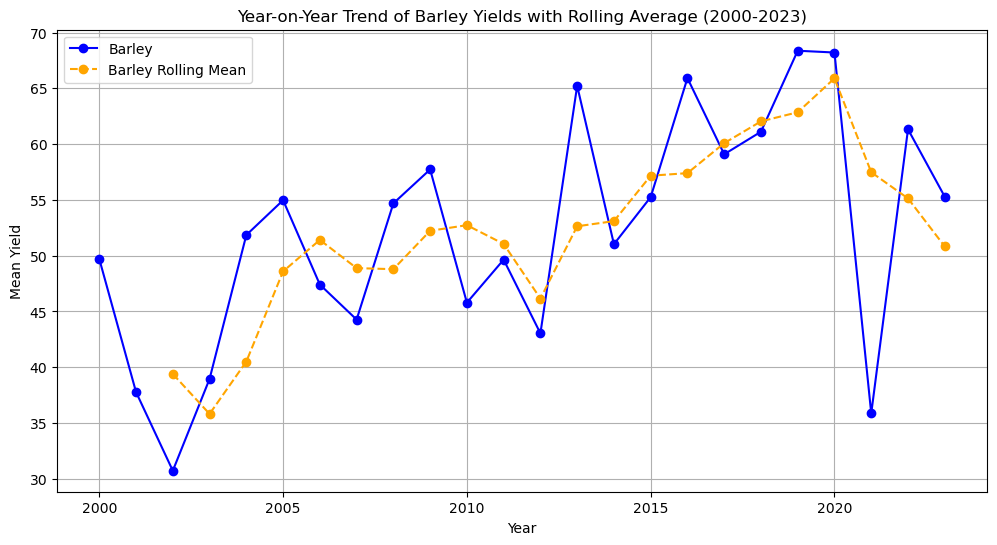

In [11]:
# Grouping and averaging the barley yields by year after removing outliers
yearly_avg_yield_cleaned = cleaned_data.groupby('Year')['Barley'].mean().reset_index()

# Calculate the rolling average for better visualization of trends
yearly_avg_yield_cleaned['Barley_Rolling_Mean'] = yearly_avg_yield_cleaned['Barley'].rolling(window=3).mean()

# Plotting the trend
plt.figure(figsize=(12, 6))
plt.plot(yearly_avg_yield_cleaned['Year'], yearly_avg_yield_cleaned['Barley'], marker='o', color='b', label='Barley')
plt.plot(yearly_avg_yield_cleaned['Year'], yearly_avg_yield_cleaned['Barley_Rolling_Mean'], marker='o', linestyle='--', color='orange', label='Barley Rolling Mean')
plt.title('Year-on-Year Trend of Barley Yields with Rolling Average (2000-2023)')
plt.xlabel('Year')
plt.ylabel('Mean Yield')
plt.legend()
plt.grid(True)
plt.show()


### K-Means clustering analysis visuals for the barley yield data from 2000 to 2023.

##### Determine the optimal number of clusters using the Elbow Method

c:\Users\muhammad.zeeshan\Anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\muhammad.zeeshan\Anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\muhammad.zeeshan\Anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\muhammad.zeeshan\Anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will chang

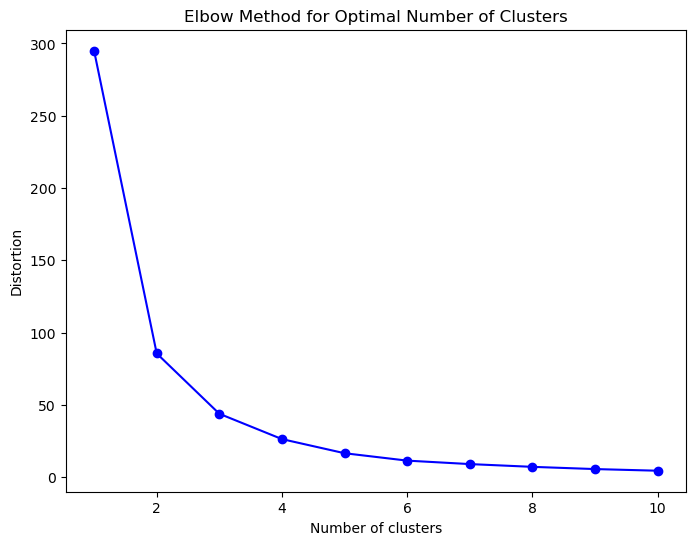

In [13]:

# Extract Barley mean yield and standardize the data
barley_yields = gdf[['Barley_mean']].dropna()
scaler = StandardScaler()
barley_yields_scaled = scaler.fit_transform(barley_yields)

# Calculate distortion for a range of cluster numbers
distortions = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(barley_yields_scaled)
    distortions.append(kmeans.inertia_)

# Plotting the Elbow Method
plt.figure(figsize=(8, 6))
plt.plot(K, distortions, 'bo-')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.show()


#### Step 2: K-Means Clustering and Visualization


 ##### Filter NaN values before clustering:


###### Align indices between the scaled data and the GeoDataFrame.

c:\Users\muhammad.zeeshan\Anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\muhammad.zeeshan\Anaconda3\Lib\site-packages\geopandas\geodataframe.py:1543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


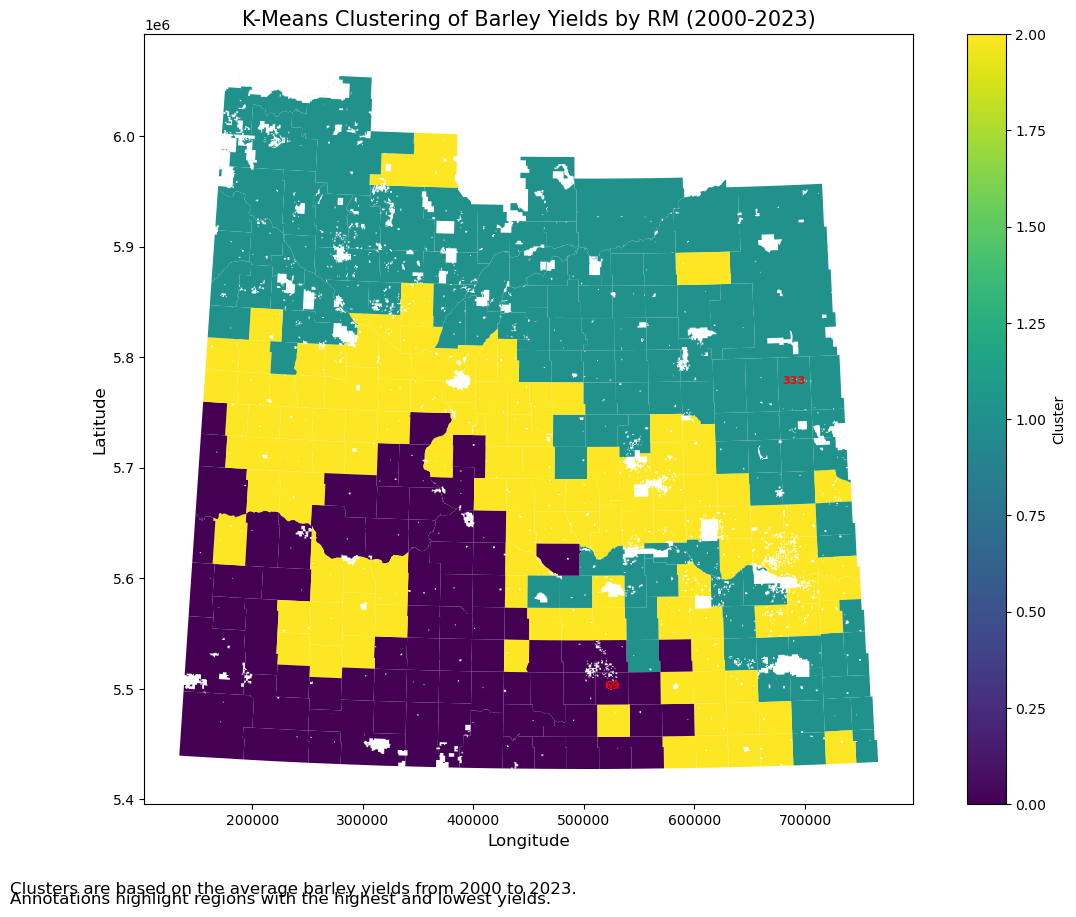

In [23]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Ensure 'merged_data' is defined as per your previous steps

# Step 1: Filter out rows with missing barley yield data
merged_data_filtered = merged_data.dropna(subset=['Barley_mean'])

# Step 2: Perform K-Means Clustering
barley_yields = merged_data_filtered[['Barley_mean']]
scaler = StandardScaler()
barley_yields_scaled = scaler.fit_transform(barley_yields)

optimal_clusters = 3
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
merged_data_filtered['Cluster'] = kmeans.fit_predict(barley_yields_scaled)

# Step 3: Create the Enhanced Plot
fig, ax = plt.subplots(1, 1, figsize=(14, 10))

# Plotting the clusters
merged_data_filtered.plot(column='Cluster', cmap='viridis', legend=True, ax=ax, legend_kwds={'label': "Cluster"})

# Adding annotations for significant RMs (e.g., highest and lowest yields)
for idx, row in merged_data_filtered.iterrows():
    if row['Barley_mean'] == merged_data_filtered['Barley_mean'].max() or row['Barley_mean'] == merged_data_filtered['Barley_mean'].min():
        plt.annotate(text=row['RM'], xy=(row.geometry.centroid.x, row.geometry.centroid.y),
                     horizontalalignment='center', fontsize=8, color='red', weight='bold')

plt.title('K-Means Clustering of Barley Yields by RM (2000-2023)', fontsize=15)
plt.xlabel('Longitude', fontsize=12)
plt.ylabel('Latitude', fontsize=12)

# Adding more context
plt.figtext(0.1, 0.02, 'Clusters are based on the average barley yields from 2000 to 2023.', wrap=True, horizontalalignment='left', fontsize=12)
plt.figtext(0.1, 0.01, 'Annotations highlight regions with the highest and lowest yields.', wrap=True, horizontalalignment='left', fontsize=12)

plt.show()


#### Visualize the Distribution of Yields Side by Side

c:\Users\muhammad.zeeshan\Anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\muhammad.zeeshan\Anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


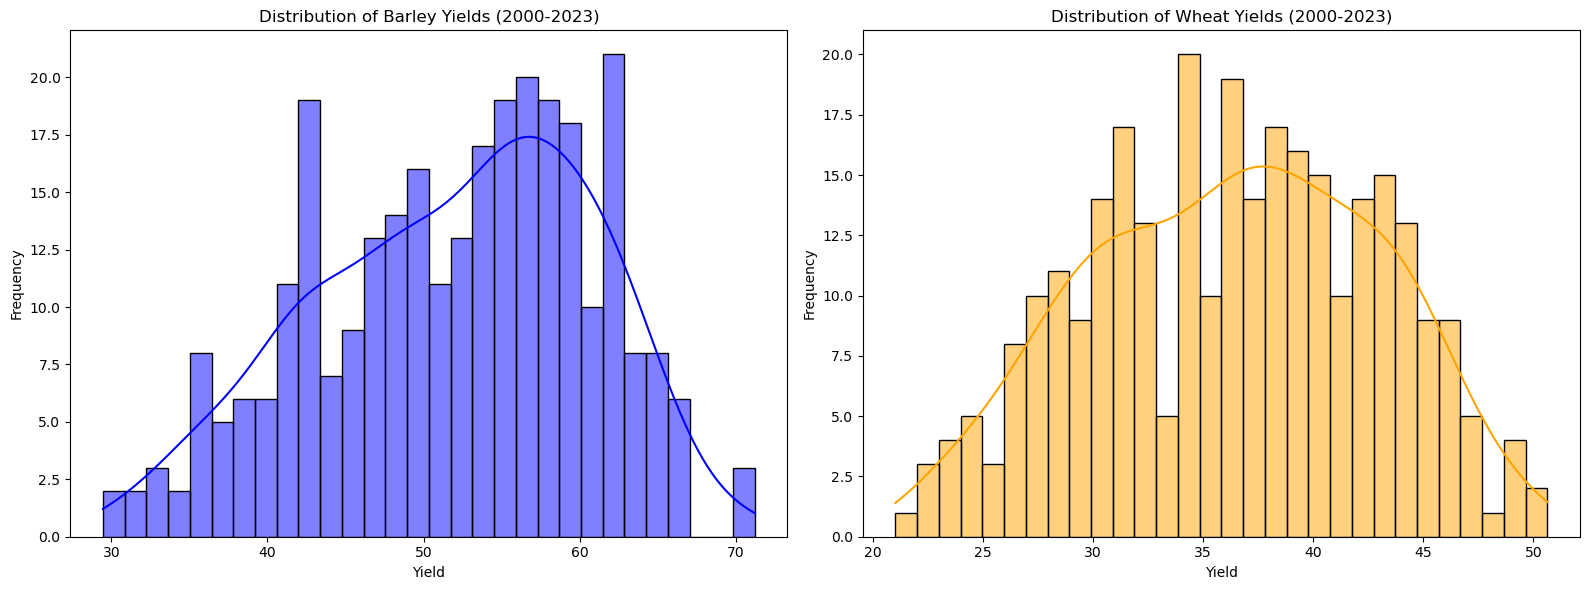

In [24]:


# Visualize the distribution of Barley and Wheat yields side by side
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Barley yield distribution
sns.histplot(df_agg_00_23['Barley_mean'], kde=True, ax=axes[0], color='blue', bins=30)
axes[0].set_title('Distribution of Barley Yields (2000-2023)')
axes[0].set_xlabel('Yield')
axes[0].set_ylabel('Frequency')

# Wheat yield distribution
sns.histplot(df_agg_00_23['Spring Wheat_mean'], kde=True, ax=axes[1], color='orange', bins=30)
axes[1].set_title('Distribution of Wheat Yields (2000-2023)')
axes[1].set_xlabel('Yield')
axes[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


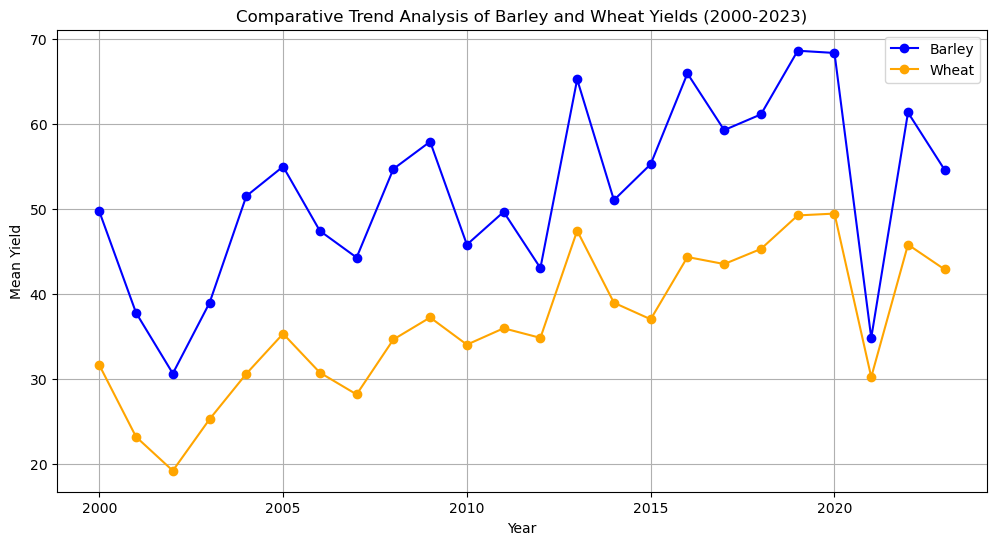

In [34]:

# Step 2: Calculate Yearly Averages
barley_trend = filtered_data.groupby('Year')['Barley'].mean().reset_index()
wheat_trend = filtered_data.groupby('Year')['Spring Wheat'].mean().reset_index()

# Step 3: Plot the Comparative Trend
plt.figure(figsize=(12, 6))

plt.plot(barley_trend['Year'], barley_trend['Barley'], label='Barley', marker='o', color='blue')
plt.plot(wheat_trend['Year'], wheat_trend['Spring Wheat'], label='Wheat', marker='o', color='orange')

plt.title('Comparative Trend Analysis of Barley and Wheat Yields (2000-2023)')
plt.xlabel('Year')
plt.ylabel('Mean Yield')
plt.legend()
plt.grid(True)
plt.show()
